In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('../data/Processed.csv')

In [28]:
data.head()

,Age,Gender,Year In School,Major,Monthly Income,Financial Aid,Tuition,Housing,Food,Transportation,Books & Supplies,Entertainment,Personal Care,Technology,Health & Wellness,Miscellaneous,Preferred Payment Method
0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


## Câu hỏi 1: Chuyên ngành (Major) và Thu nhập hằng tháng (Monthly Income) có ảnh hưởng đến tiền trợ cấp không (Financial Aid)?

### 1. Purpose

Việc tìm hiểu mối quan hệ giữa chuyên ngành và thu nhập hằng tháng đối với tiền trợ cấp có thể giúp sinh viên định hướng chuyên ngành để theo học dựa vào mức kinh tế của gia đình và bản thân. Từ đó, giảm bớt được gánh nặng kinh tế cho gia đình và có định hướng rõ ràng cho con đường học vấn.

### 2. Analyze

In [29]:
df = data[['Major', 'Monthly Income', 'Financial Aid']]
income_on_major = df.groupby('Major')['Monthly Income'].sum()
aid_on_major = df.groupby('Major')['Financial Aid'].sum()

### 3. Visualize

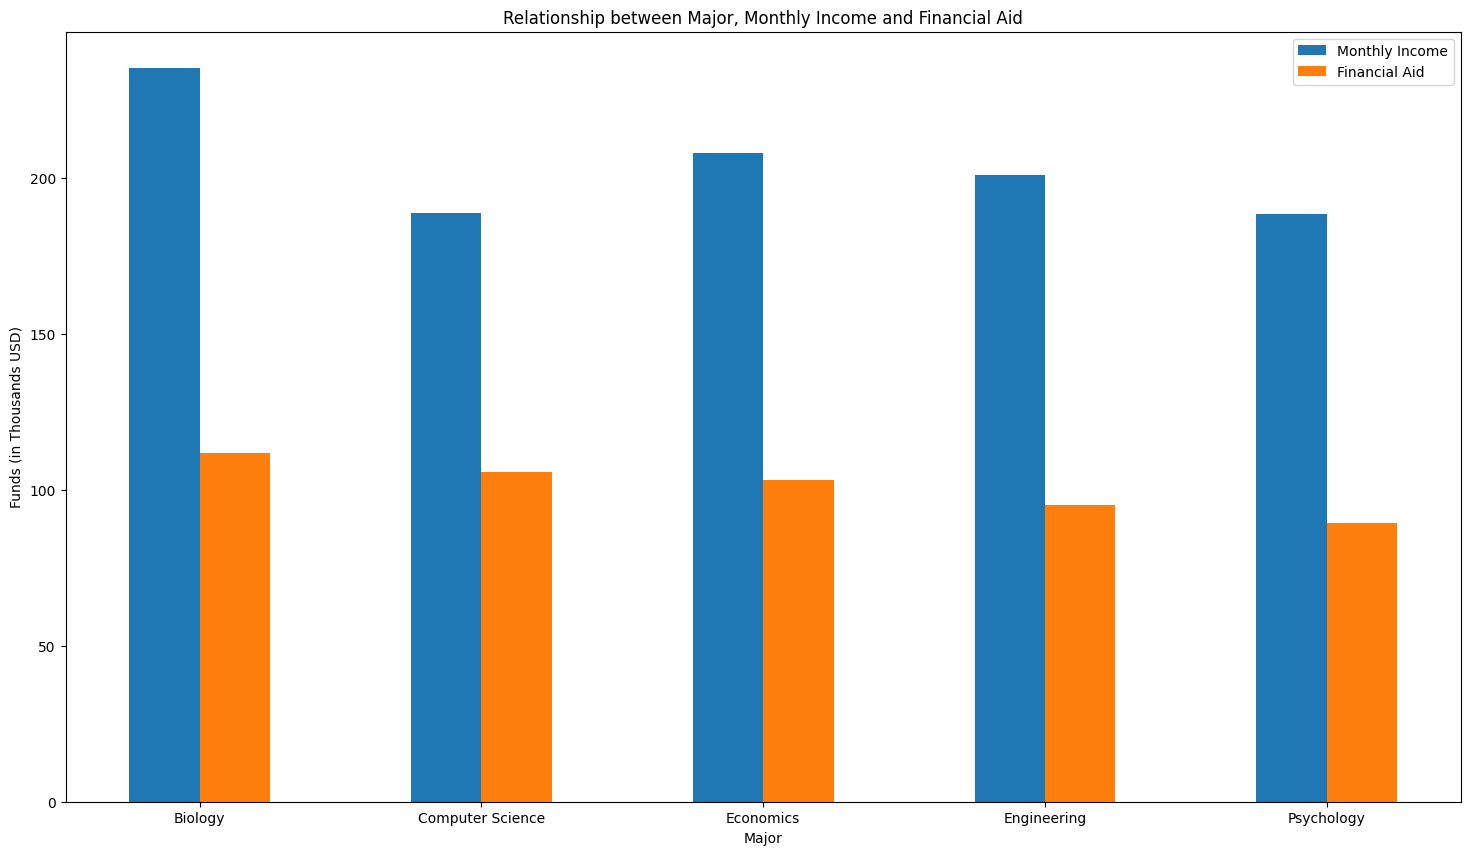

In [30]:
majors = income_on_major.index

plt.figure(figsize = (18, 10))

positions = np.arange(len(majors))
rect1 = plt.bar(x = positions - 0.125, height = income_on_major / 1000, 
        width = 0.25, align = 'center', label = 'Monthly Income')
rect2 = plt.bar(x = positions, height = aid_on_major / 1000, 
        width = 0.25, align = 'edge', label = 'Financial Aid')

plt.xlabel('Major')
plt.ylabel('Funds (in Thousands USD)')
plt.xticks(range(0, 5), majors)
plt.title('Relationship between Major, Monthly Income and Financial Aid')
plt.legend(loc = 'best')

#plt.savefig("figures/Question1-Vỹ.svg")

plt.show()

### 4. Observation

Dựa vào biểu đồ, ta có thể thấy:
- Đối với các chuyên ngành, các chuyên ngành có thiên hướng nghiên cứu khoa học như `Biology` và `Computer Science` được trợ cấp nhiều hơn các chuyên ngành hướng về thực tế. Điều này dễ hiểu bởi vì nghiên cứu khoa học cần thí nghiệm nghiên cứu hoặc đầu tư vào trang thiết bị, cũng như là các khảo sát để lấy số liệu cho việc nghiên cứu.
- Tiền trợ cấp có xu hướng tăng khi thu nhập hằng tháng tăng. Tuy nhiên, ta cũng thấy rằng tiền trợ cấp cũng không quá phụ thuộc vào thu nhập hằng tháng và chuyên ngành theo học thông qua 2 chuyên ngành `Computer Science` và `Psychology`. Mặc dù có mức thu nhập thấp nhất nhưng sinh viên `Computer Science` có mức trợ cấp cao hơn hầu hết các chuyên ngành khác. \
Vì vậy, ta kết luận mức trợ cấp không quá phụ thuộc vào chuyên ngành và thu nhập hằng tháng, và cần nhiều dữ liệu hơn để có thể đánh giá thêm.

## Câu hỏi 2: Phương thức thanh toán được sinh viên từng độ tuổi ưu tiên sử dụng?

### 1. Purpose

Để biết được thói quen tiêu dùng của sinh viên thuộc các độ tuổi khác nhau, từ đó có thể đưa ra nhận định tổng quát cho toàn bộ sinh viên.

### 2. Analyze and Visualize

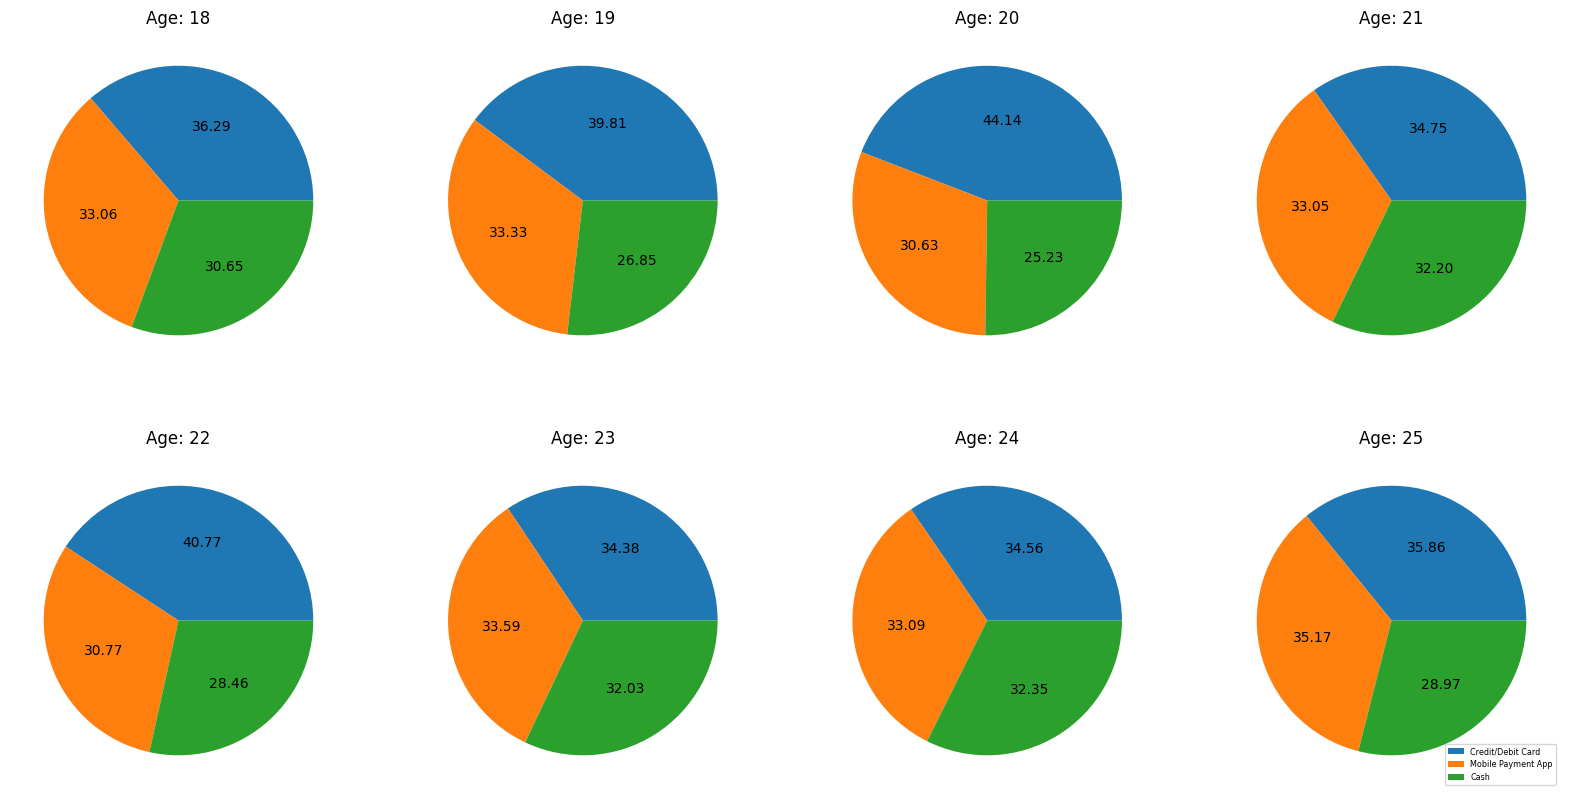

In [31]:
payment_methods = data.groupby('Age')['Preferred Payment Method'].value_counts()
payment_methods = pd.DataFrame(payment_methods).reset_index()

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

row = 0
for i, age in enumerate(payment_methods['Age'].unique()):
    ax[row, i % 4].pie(payment_methods[payment_methods['Age'] == age]['count'], autopct = '%.2f')
    ax[row, i % 4].set_title(f'Age: {age}')
    
    if i == 3:
        row += 1
        
plt.legend(payment_methods['Preferred Payment Method'].unique(), fontsize = 'xx-small', loc = 'lower right')
#plt.savefig("figures/Question2-Vỹ.svg")
plt.show()

### 3. Observation

Theo biểu đồ trên, các sinh viên ở các độ tuổi khác nhau sử dụng khá đồng đều các phương thức thanh toán. Phương thức thanh toán thông qua ứng dụng online được sinh viên khá ưu tiên sử dụng. Điều này là dễ hiểu vì ở lứa tuổi thanh niên dễ tiếp cận các loại công nghệ.